In this notebook we will explore the harship index for Woodlawn, Chicago in relationship to other Chicago neighborhoods for two five-year periods ending in 2014 and in 2017.

The variables are designated as follows:

<ul>
    <li> HI = hardship index </li>
    <li> UNEMP = % of community age 16 and older who are unemployed. </li>
     <li> NOHS = % of community age 25 and older without a high school diploma. </li>
         <li> DEP = % of community who are dependent (under age 18 or over age 64). </li>
             <li> HOUS= % of community with overcrowded housing (more than 1 occupant per room).</li>
                 <li> POV = % below federal poverty line
    <li> INC = per capita income.</li>
             
 Data Source: https://greatcities.uic.edu/wp-content/uploads/2016/07/GCI-Hardship-Index-Fact-SheetV2.pdf (2010-2014) https://greatcities.uic.edu/wp-content/uploads/2019/12/Hardship-Index-Fact-Sheet-2017-ACS-Final-1.pdf (2013-2017).       

1) We begin by importing Python's data analytics (pandas) and Numerical Python (numpy) libraries. (Press shift+enter to execute each cell)

In [1]:
import pandas as pd
import numpy as np

2) We use pandas (pd) to import the data file 'HI20142017.xlsx' to a dataframe called "raw_hardship".

In [2]:
raw_hardship=pd.read_excel('HIHOM20142017.xlsx')
raw_hardship.head(1)

,Community,index,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM14,HOM17
0,Rogers Park,0,39.7,9.3,16.4,27.2,7.1,24.0,24323,39.4,7.7,9.5,26.2,6.6,22.6,25874,8,4


3) Let's separate the 2014 and 2017 hardship index (HI) data into two dataframes called "HI14" and "HI17". The column names will reflect the year.

In [3]:
HI14=raw_hardship[["Community","HI14","UNEMP14","NOHS14","DEP14","HOUS14","POV14","INC14","HOM14"]]
HI14 = HI14.rename(columns = {'Community':'Community14'})
HI17=raw_hardship[["Community","HI17","UNEMP17","NOHS17","DEP17","HOUS17","POV17","INC17","HOM17"]]
HI17 = HI17.rename(columns = {'Community':'Community17'})
HI14.head(2)

,Community14,HI14,UNEMP14,NOHS14,DEP14,HOUS14,POV14,INC14,HOM14
0,Rogers Park,39.7,9.3,16.4,27.2,7.1,24.0,24323,8
1,West Ridge,44.3,10.0,17.1,38.3,7.6,17.4,23498,3


In [4]:
HI17.head(2)

,Community17,HI17,UNEMP17,NOHS17,DEP17,HOUS17,POV17,INC17,HOM17
0,Rogers Park,39.4,7.7,9.5,26.2,6.6,22.6,25874,4
1,West Ridge,47.3,8.6,11.7,37.9,7.7,16.8,24721,2


4) In the next cell we'll define a function 

makescatterplot(HI14,HI17,community_list,show_all,index1,index2,xaxislabel,yaxislabel,xrange,title) 

which uses the data in HI14 and HI17 to makes scatterplots of (index1,index2). Brief explanation or examples of all the inputs to the function are described below.

<ul>
    <li> HI14 -- the dataframe with 2014 hardship index data </li>
    <li> HI17 -- the dataframe with 2017 hardship index data </li>
    <li> community_list --  a list of names of 1 or more communities, for eg. ['Woodlawn','Englewood','Austin'] </li>
    <li> show_all -- Value is either True (in which case the scatterplotplot will show the names of all 77 communities) or False (in which case the scatterplot will only show the names of the community_list on the scatterplot) </li> 
    <li> index1 -- Name of the column (do not include the year) whose values are to be plotted as x coordinates  eg."UNEMP" </li>
    <li> index 2 -- Name of the column (do not include the year) whose values are to be plotted as y coordinates. eg. "NOHS" </li>  
    <li>xaxislabel -- Label on the x-axis eg. "% Age 16+ Unemployed"</li>
    <li>yaxislabel -- Label on the y-axis eg. "% Age 25+ without a High School Diploma"</li>
    <li> xrange -- Labeled tick marks on the x-axis eg. np.arange(0,42,1) will display the numbers 0,1,2,..., 41  on the x-axis or np.arange(0,51,2)  will display the numbers 0,2,4,...,48,50 on the x-axis</li>
    <li> title-- Title at the top of the scatterplot eg. "Unemployment and Education 2014(gray) 2017 (red)"
    
        
        

In [5]:
def makescatterplot(HI14,HI17,community_list,show_all,index1,index2,xaxislabel,yaxislabel,xrange,title):
    #import plotting tools
    import matplotlib
    import matplotlib.pyplot as plt
        #create a new figure
    fig=plt.figure(figsize=(16,20)) 
    ax1 = fig.add_subplot(111)
    plt.xticks(np.arange(0,91,5))
    plt.yticks(np.arange(0,86,5))
    #plot the 2014 points with size given by the HI value
    ax1.scatter(HI14['HOM14'],HI14['HI14'],c=['gray'], s=40, alpha=.25,label='2014')   
    ax1.scatter(HI17['HOM17'],HI17['HI17'],c=['red'], s=40, alpha=.25,label='2017')   
        #Add labels to the HI14 points
    for i in HI14.index:
        if (HI14.loc[i,"Community14"] not in community_list) and show_all:
            ax1.text(HI14.loc[i,index1+'14'], HI14.loc[i,index2+'14']+.25,HI14.loc[i,"Community14"],ha='center', color='k', fontsize=5)
        elif HI14.loc[i,"Community14"] in community_list:
            ax1.text(HI14.loc[i,index1+'14'], HI14.loc[i,index2+'14']+.25,HI14.loc[i,"Community14"],ha='center', color='k', fontsize=20)
            ax1.text(HI14.loc[i,index1+'14'],HI14.loc[i,index2+'14']-.25,'x',ha='center', color='k', fontsize=10)
    
    #Add Labels for the HI17 points   
    for i in HI17.index:
        if (HI17.loc[i,"Community17"] not in community_list) and show_all:      
            ax1.text(HI17.loc[i,index1+'17'], HI17.loc[i,index2+'17']+.25,HI17.loc[i,"Community17"],ha='center', color='r', fontsize=5)
            
        elif HI14.loc[i,"Community14"] in community_list:
            ax1.text(HI17.loc[i,index1+'17'], HI17.loc[i,index2+'17']+.25,HI17.loc[i,"Community17"],ha='center', color='r', fontsize=20)
            ax1.text(HI17.loc[i,index1+'17'], HI17.loc[i,index2+'17']-.25,'x',ha='center', color='r', fontsize=10)
    #Add a Title
    plt.title(title,size=20)
    plt.xlabel(xaxislabel,size=15)
    plt.ylabel(yaxislabel,size=15)
    plt.legend(fontsize=20)                 
    #Save the figure to a file
    plt.savefig(index1+index2+'.png')

<h2> Homicides

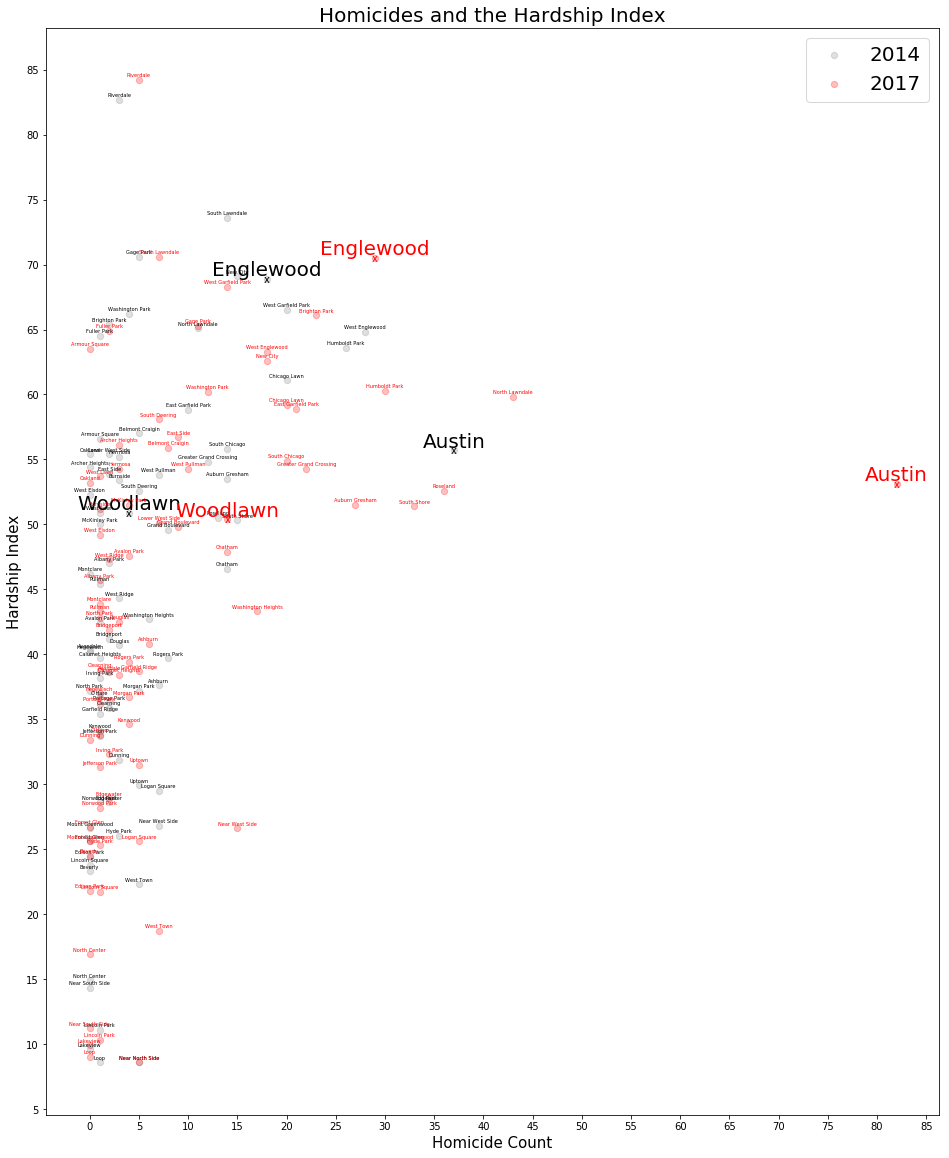

In [7]:
makescatterplot(HI14,HI17,['Woodlawn','Englewood','Austin'],True,"HOM","HI","Homicide Count","Hardship Index",np.arange(0,87,2),"Homicides and the Hardship Index")